<a href="https://colab.research.google.com/github/vncgabriel/PersonalRepositoy/blob/main/Tabajo_Inteligencia_de_Negocios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Investigación Motivaciones de Churn en un Banco

### Origen de los datos:

En este archivo analizaremos un conjunto de datos de Kaggle disponible en el siguiente enlace:


```
https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn
```




### Contexto:

Fui contratado por el banco luego de que se constatara una gran cantidad de clientes cancelando sus cuentas y generando *Churn* (métrica referente a la salida de clientes).

El objetivo es investigar las motivaciones detrás de este *churn* y buscar soluciones estratégicas basadas en datos para revertir esta situación. Para ello, analizaremos diferentes factores dentro del contexto de los clientes y sus motivaciones para desistir, buscando identificar patrones que nos permitan enfocar esfuerzos en mantenerlos como clientes.



### Metodología:

Seguiremos una metodología que consiste, en primer lugar, en evaluar las principales correlaciones. Posteriormente, buscaremos patrones más complejos que sirvan de base para estrategias más enfocadas en acciones a corto y medio plazo. Inicialmente, se elegirá un público objetivo en el cual centrarse, para luego ampliar la estrategia e incluir todos los públicos.

##Importación de datos y librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Customer-Churn-Records.csv')

## Analisis 1

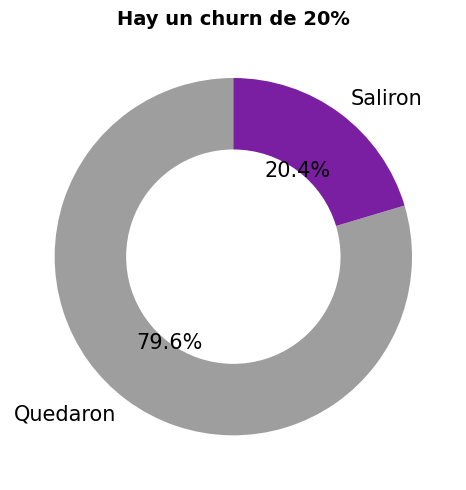

In [15]:
churn = df['Exited'].value_counts()

colors = ['#9E9E9E', '#7B1FA2']
labels = ['Quedaron', 'Saliron']

fig, ax = plt.subplots(figsize=(5, 5))
wedges, texts, autotexts = ax.pie(
    churn,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 15},
    wedgeprops={'width': 0.4})

ax.set_title("Hay un churn de 20%", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

Inicialmente, observamos un churn del 20,4%, lo cual se considera alto. Es decir, 2 de cada 10 clientes del banco han cerrado sus cuentas. Esto representa un riesgo para la sostenibilidad de la empresa, ya que, para mantener o mejorar sus resultados financieros, se debe invertir mucho en marketing solo para conseguir, como mínimo, la misma cantidad de clientes.


## Analisis 2

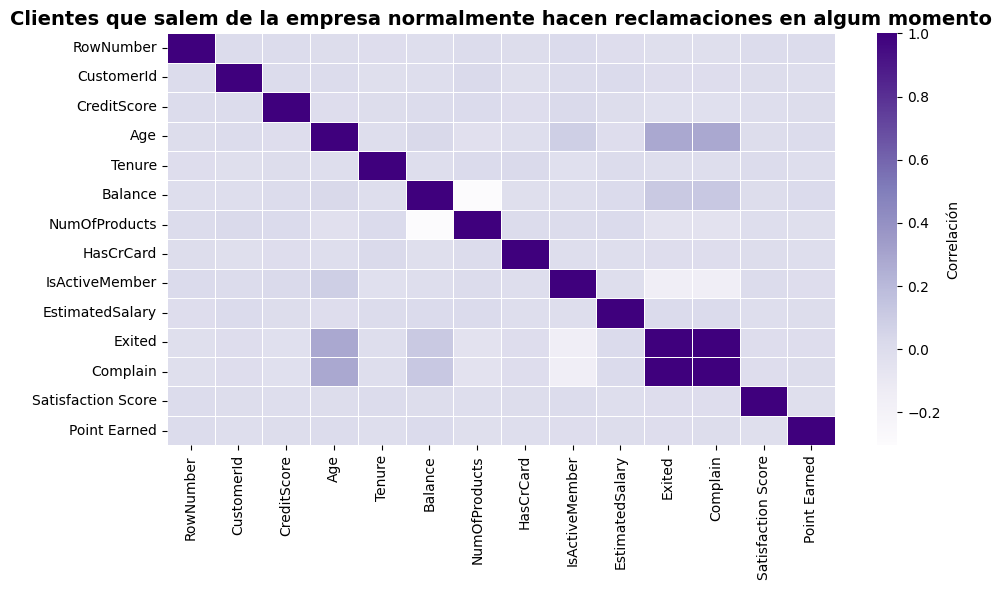

In [23]:
num_cols = df.select_dtypes(include='number')
corr = num_cols.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, cmap='Purples', linewidths=0.5, linecolor='white', cbar_kws={'label': 'Correlación'})
plt.title('Clientes que salem de la empresa normalmente hacen reclamaciones en algum momento', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


## Analisis 3

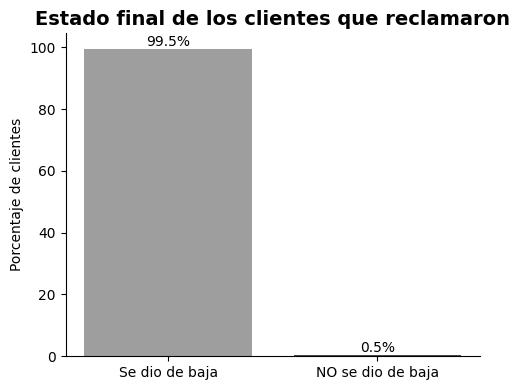

In [24]:
if 'Complain' in df.columns:
    reclamaron = df[df['Complain'] == 1]

    # Calcular porcentajes de churn dentro de este grupo
    churn_reclamaron = reclamaron['Exited'].value_counts(normalize=True) * 100
    churn_reclamaron.index = ['Se dio de baja', 'NO se dio de baja']

    plt.figure(figsize=(5, 4))
    bars = plt.bar(churn_reclamaron.index, churn_reclamaron.values, color=colors)

    for i, val in enumerate(churn_reclamaron.values):
        plt.text(i, val + 1, f'{val:.1f}%', ha='center', fontsize=10)

    plt.title('Estado final de los clientes que reclamaron', fontsize=14, weight='bold')
    plt.ylabel('Porcentaje de clientes')
    plt.xlabel('')
    sns.despine()
    plt.tight_layout()
    plt.show()

else:
    print("La columna 'Complain' no se encuentra en el conjunto de datos.")


Actualmente, la empresa tiene un 99,5% de personas que han presentado una reclamación y que posteriormente se han dado de baja.

Esto es un indicio muy negativo, ya que probablemente no cuentan con un servicio de atención al cliente eficiente, o bien no tienen un proceso bien estructurado. Por lo tanto, es fundamental reforzar ese sector de la empresa, ya sea remodelando el proceso existente o construyendo uno nuevo con un equipo dedicado específicamente a ello.


## Analisis 4

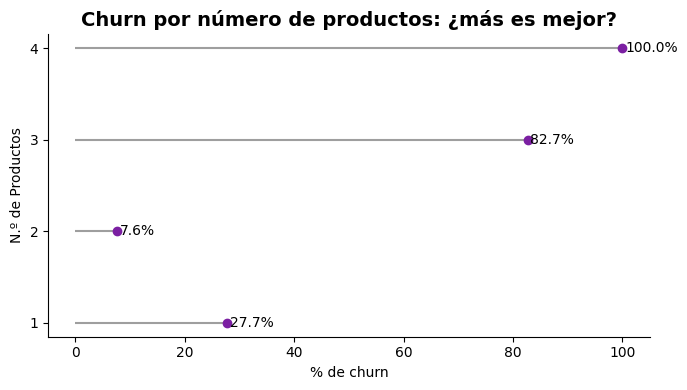

In [25]:
prod_churn = df.groupby('NumOfProducts')['Exited'].mean() * 100

plt.figure(figsize=(7, 4))
plt.hlines(y=prod_churn.index.astype(str), xmin=0, xmax=prod_churn.values, color='#9E9E9E')
plt.plot(prod_churn.values, prod_churn.index.astype(str), "o", color='#7B1FA2')

for i, val in enumerate(prod_churn.values):
    plt.text(val + 0.5, i, f'{val:.1f}%', va='center', fontsize=10)

plt.title('Churn por número de productos: ¿más es mejor?', fontsize=14, weight='bold')
plt.xlabel('% de churn')
plt.ylabel('N.º de Productos')
sns.despine()
plt.tight_layout()
plt.show()

Otro indicio bastante preocupante es que los segmentos con 3 y 4 productos están abandonando el banco en gran cantidad. Esto representa un riesgo importante, ya que se están perdiendo clientes que, en teoría, serían los más rentables para la empresa. Esto indica que la gestión de los principales clientes es demasiado débil.

Probablemente, los procesos de atención al cliente deberían comenzar priorizando a los clientes de categorías estratégicas, ya sea por tener una mayor cantidad de productos contratados o por pertenecer a una categoría con mayor poder adquisitivo. El objetivo es garantizar que estos clientes más relevantes se mantengan en la base.


## Analisis 5

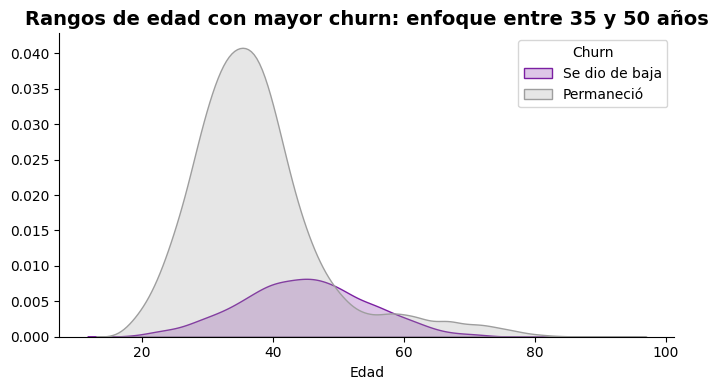

In [29]:
plt.figure(figsize=(7, 4))
sns.kdeplot(data=df, x='Age', hue='Exited', fill=True, palette=['#9E9E9E', '#7B1FA2'])

plt.title('Rangos de edad con mayor churn: enfoque entre 35 y 50 años', fontsize=14, weight='bold')
plt.xlabel('Edad')
plt.ylabel('')
plt.legend(title='Churn', labels=['Se dio de baja', 'Permaneció'])
sns.despine()
plt.tight_layout()
plt.show()

Al observar los gráficos, vemos que hay una mayor salida de clientes entre los 35 y 40 años. Es un hecho interesante que ayuda a entender el perfil de quienes se dan de baja, y permite al equipo de marketing desarrollar estrategias de *remarketing*, es decir, acciones dirigidas a estos clientes, ya sea para su retención o para incentivar la adquisición de nuevos productos y, de esa forma, lograr que se mantengan en el banco.


## Analisis 6

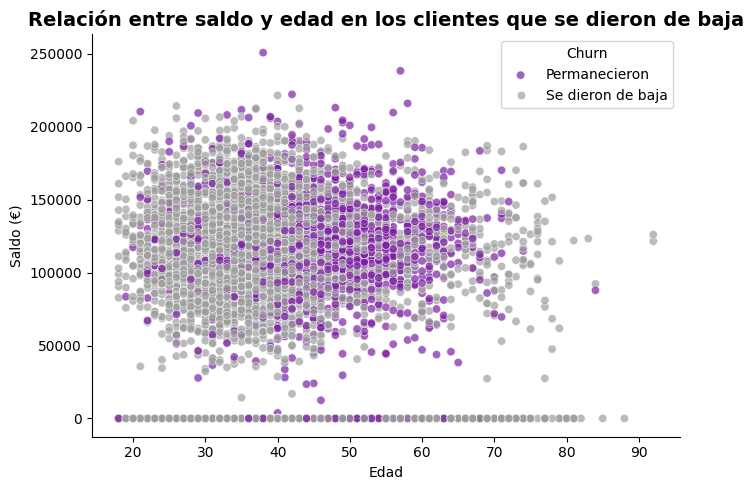

In [30]:
plt.figure(figsize=(7, 5))
palette = {0: '#9E9E9E', 1: '#7B1FA2'}

sns.scatterplot(data=df, x='Age', y='Balance', hue='Exited', palette=palette, alpha=0.7)

plt.title('Relación entre saldo y edad en los clientes que se dieron de baja', fontsize=14, weight='bold')
plt.xlabel('Edad')
plt.ylabel('Saldo (€)')
plt.legend(title='Churn', labels=['Permanecieron', 'Se dieron de baja'])
sns.despine()
plt.tight_layout()
plt.show()

Aquí vemos que las personas que se dan de baja suelen tener más de 35 años y menos de 70, un rango de edad que puede ser trabajado estratégicamente. Además, el saldo no parece ser un factor relevante para la salida de los clientes.


## Analisis 7

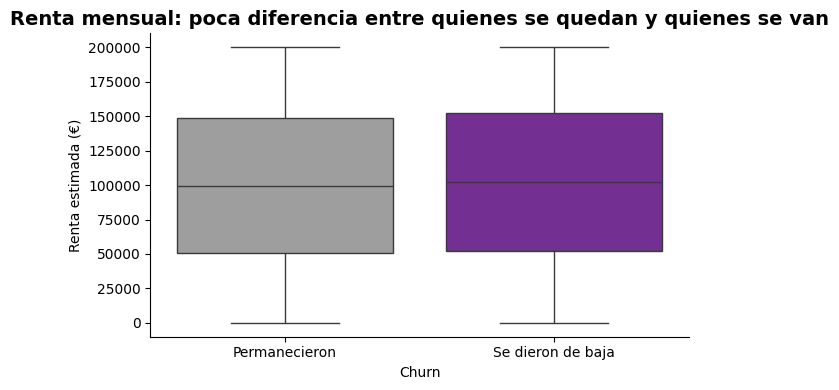

In [34]:
plt.figure(figsize=(6.5, 4))
sns.boxplot(data=df, x='Exited', y='EstimatedSalary', hue='Exited', palette=['#9E9E9E', '#7B1FA2'])
plt.legend([],[], frameon=False)

plt.title('Renta mensual: poca diferencia entre quienes se quedan y quienes se van', fontsize=14, weight='bold')
plt.xlabel('Churn')
plt.ylabel('Renta estimada (€)')
plt.xticks([0, 1], ['Permanecieron', 'Se dieron de baja'])
sns.despine()
plt.tight_layout()
plt.show()


## Analisis 8

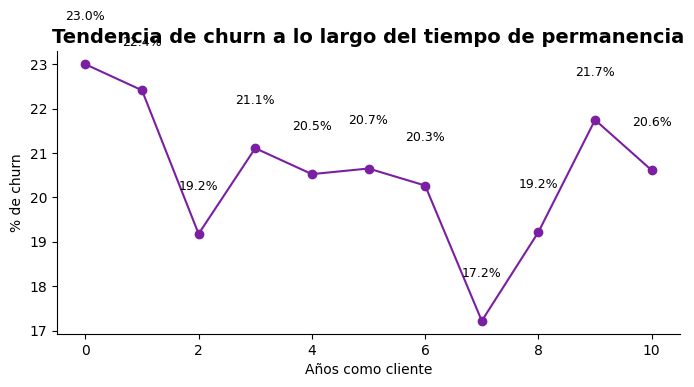

In [36]:
# Verificación de la existencia de la columna
if 'Tenure' in df.columns:
    churn_time = df.groupby('Tenure')['Exited'].mean() * 100

    plt.figure(figsize=(7, 4))
    plt.plot(churn_time.index, churn_time.values, marker='o', color='#7B1FA2')

    for x, y in zip(churn_time.index, churn_time.values):
        plt.text(x, y + 1, f'{y:.1f}%', ha='center', fontsize=9)

    plt.title('Tendencia de churn a lo largo del tiempo de permanencia', fontsize=14, weight='bold')
    plt.xlabel('Años como cliente')
    plt.ylabel('% de churn')
    sns.despine()
    plt.tight_layout()
    plt.show()
else:
    print("Columna 'Tenure' no encontrada.")


Un punto relevante de este gráfico es el aumento del *churn* entre personas con más de 8 años como clientes. Esto indica que la empresa está perdiendo clientes antiguos, que suelen ser más valiosos para el negocio. Estos perfiles deben ser trabajados con prioridad para garantizar la sostenibilidad a largo plazo de la empresa.

## Conclusión

Para concluir, observamos que la empresa probablemente necesita reformular por completo su servicio de atención al cliente, ya que se encuentra en una situación de baja resolución de satisfacción entre los clientes que han presentado reclamaciones. Es fundamental comprender los principales motivos y abordarlos de manera más asertiva.

Al analizar los datos, vemos que se puede priorizar a los clientes con más productos contratados y con mayor antigüedad en la empresa, con el objetivo de retener primero a los clientes más valiosos y, posteriormente, ampliar los esfuerzos a toda la base de clientes. Esto, combinado con campañas del equipo de marketing dirigidas a personas entre 35 y 50 años, puede generar resultados significativos en la retención de clientes.
